<a href="https://colab.research.google.com/github/Thalisonh/Setembro-Amarelo-Analise/blob/master/SetembroAmarelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setembro Amarelo**
###A analises de dados sobre o suicídio como forma de conscientizar sobre um problema que assola silenciosamente à sociedade. Dar visibilidade ao problema é o primeiro passo para conseguir reverter a situação, esse é o principal objetivo dessa analise, conscientizar e mostrar o tamanho desse problema.

###Setembro amarelo é o mês de prevenção do suicídio, esse projeto é uma forma enxergar e dar visibilidade a um tema tão importante, e uma forma de mostrar como a analises de dados pode ser e deve ser feita com qualquer tipo de dados a fim de resolver problemas da vida real.

#**Sobre o Dataset**
###O conjunto de dados foi extraído de quatro outros conjuntos de dados vinculados por tempo e país, foi construído para encontrar sinais correlacionados ao aumento das taxas de suicídio entre um conjunto diferente de pessoas.

###Referencias:

###Conjunto dos dados prontos:
###https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/notebooks

###United Nations Development Program. (2018). Human development index (HDI). Retrieved from [http://hdr.undp.org/en/indicators/137506](http://hdr.undp.org/en/indicators/137506)

###World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#
###http://databank.worldbank.org/data/source/world-development-indicators#

###[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from [https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)

###World Health Organization. (2018). Suicide prevention. Retrieved from [http://www.who.int/mental_health/suicide-prevention/en/](http://www.who.int/mental_health/suicide-prevention/en/)

#**Variáveis**
O arquivo .csv está separado em 12 colunas, retirados dos datasets acima.

**country**: país de origem do dados

**year**: ano de registro dos dados (1987 - 2016)

**sex**: sexo do registro (Masculino - Feminino)

**age**: faixa etária

- 5-14 anos
- 15-24 anos
- 25-34 anos
- 35-54 anos
- 55-74 anos
- 75+ anos

**suicides_no:** número de suicídios

**population:** população para o grupo

**suicides/100k pop:** número de suicídios por 100 mil habitantes

**country_year:** identificador contendo country + year

**HDI for year:** Índice de Desenvolvimento Humano (IDH) para o ano

**gdp_for_year:** Produto Interno Bruto (PIB) para o ano

**gdp_per_capita:** Produto Interno Bruto (PIB) per capita

#**Iniciando a Análise**
###O conjunto de dados contem 27820 linhas e 12 colunas. De inicio é preciso visualizar o tamanho dos dados e a forma que eles se encontram, como forma de boas praticas é preciso fazer uma limpeza e uma adequação dos dados para que as duas variáveis comparativas tenham a mesma quantidade de valores preenchidos. 

###Após a limpeza iniciando criando duas variáveis que contem os dados do Brasil e do Mundo para facilitar a comparação entre elas.

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importando arquivo csv
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/setembroAmarelo/master.csv', ',')

In [ ]:
#removendo variaveis com taxa de suicidios 0
indexNames = df[df['suicides/100k pop'] == 0].index.values
df = df.drop(indexNames)

In [ ]:
#visualizando os primeiros 5 elementos do DataFrame
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#vizualizando os ultimos 5 elementos do DataFrame
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [ ]:
#visualizando o tipo de dados das colunas
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
#fazendo uma copia do DataFrame apenas com dados brasileiros
df_brasil = df[df.country == "Brazil"].copy()

In [ ]:
#visualizando os primeiros elementos do DataFrame Brasil
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [ ]:
#visualizando os ultimos elementos do DataFrame Brasil
df_brasil.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4539,Brazil,2015,female,25-34 years,466,17546090,2.66,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4540,Brazil,2015,female,75+ years,89,3802086,2.34,Brazil2015,NaN,"1,802,214,373,741",9431,Silent
4541,Brazil,2015,female,15-24 years,397,17047218,2.33,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4542,Brazil,2015,male,5-14 years,79,16057040,0.49,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z
4543,Brazil,2015,female,5-14 years,56,15430579,0.36,Brazil2015,NaN,"1,802,214,373,741",9431,Generation Z


In [ ]:
#years = df['year'].unique()

In [ ]:
#alocando todos os anos do registro em uma lista
years = []

for i in df_brasil['year']:
  if i not in years:
    years.append(i)

years

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

#**Tendência taxa suicidio**

##Comparando Brasil e mundo

###A melhor forma de comparação é usando a taxa de suicídios de 100k/pop, pois em termos absolutos com o crescimento e as diferenças populacionais os resultados poderiam ser enganadores.

In [ ]:
#media de suicidios por 100k no Brasil
suicidio_brasil = df_brasil.groupby('year')['suicides/100k pop'].mean()

In [ ]:
#media de suicidios por 100k no Mundo
suicidio_mundo = df.groupby('year')['suicides/100k pop'].mean()

In [ ]:
#removendo o ultimo valor de suicidio_mundo para igualar aos dados do Brasil
suicidio_mundo.drop(2016, inplace=True)

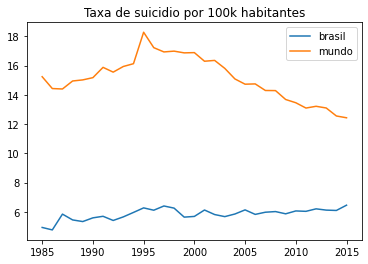

In [ ]:
#Exibir comparação da Taxa de suicidio Brasil e Mundo
plt.plot(years, suicidio_brasil, label="brasil")
plt.plot(years, suicidio_mundo, label="mundo")

plt.title("Taxa de suicidio por 100k habitantes")
plt.legend()
plt.show()

###É possível observar de o Brasil e o mundo estão em situações bem diferentes nos últimos anos, em quanto o mundo vem com uma tendência de queda nos ultimo 20 anos, o Brasil está com uma tendencia de crescimento no mesmo período.

#Choque de gerações

###A analises histórica é uma ótima forma de aprender com o passado, desse modo, visualizar a média de suicídios por geração se torna totalmente relevante ao presente.

###**Boomers:** Nascidos após a Segunda Guerra Mundial. (1946 - 1964)
###**G.I. Generation:** Geração da Primeira e Segunda Guerra Mundial. (1900 - 1927)
###**Generation X:** Geração após os Boomer, pós-Segunda Guerra Mundial. (1965 - 1980)
###**Generation Z:** Geração que corresponde à idealização e nascimento da World Wide Web (1990 - 2010)
###**Millenials:** Geração desenvolveu-se numa época de grandes avanços tecnológicos e prosperidade econômica (1981 - 1995)
###**Silent:** Geração nascida durante a grande depressão e a segunda guerra mundial (1925 - 1942)

In [ ]:
#vizualizando todas as gerações do DataFrame
df['generation'].value_counts()

Generation X       5638
Silent             5382
Millenials         4716
Boomers            4568
G.I. Generation    2251
Generation Z        984
Name: generation, dtype: int64

In [ ]:
#Taxa anual de suicidios per 100k colocado em um dicionario
geracoes = dict(df.groupby('generation')['suicides/100k pop'].mean())
geracoes

{'Boomers': 16.103995183887907,
 'G.I. Generation': 29.19096401599291,
 'Generation X': 11.998660872649893,
 'Generation Z': 0.9595325203252029,
 'Millenials': 6.671276505513148,
 'Silent': 21.779552211073955}

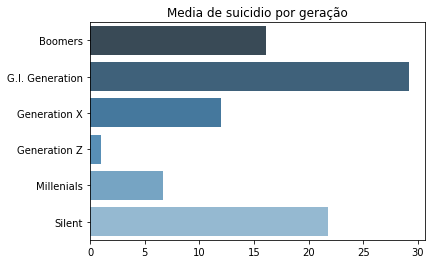

In [ ]:
#exibindo o numero de suicidios por geração
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(list(geracoes.values()), list(geracoes.keys()), palette="Blues_d")
plt.title("Media de suicidio por geração")
plt.show()

###É evidente a grande diferença da taxa de suicídio entre as gerações, as três primeiras gerações são frutos de momentos históricos bastantes complicados como a Grande Depressão e duas Guerras Mundias, mostrando que há uma correlação entre as dificuldades sociais com a taxa de suicídio. 

#Taxa de suicídio entre homens e mulheres
###Uma comparação entre a taxa de suicídios entre homens e mulheres e extremamente relevante para tentar entender o problema. 

In [ ]:
##taxa de suicidios no Mundo por sexo
sexo_mundo = dict(df.groupby('sex')['suicides/100k pop'].mean())
feminino_mundo = sexo_mundo['female']
masculino_mundo = sexo_mundo['male']

In [ ]:
##taxa de suicidios no Brasil por sexo
sexo_brasil = dict(df_brasil.groupby('sex')['suicides/100k pop'].mean())
feminino_brasil = sexo_brasil['female']
masculino_brasil = sexo_brasil['male']

In [ ]:
#dados a serem plotados
labels = ['Feminino', 'Masculino']
brasil = [feminino_brasil, masculino_brasil]
mundo = [feminino_mundo, masculino_mundo]

In [ ]:
#ajustes para construir o grafico
x = np.arange(len(labels))
width_bar = 0.35

cor_brasil = "#253760"
cor_mundo = "#CFCDCE"

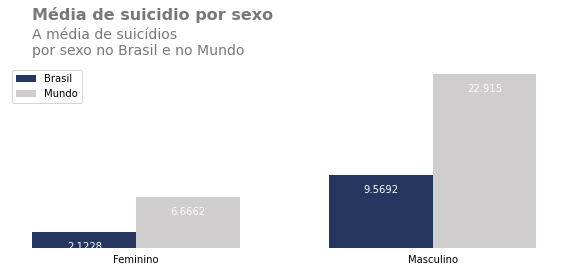

In [ ]:
#cria uma figura para grafico de barras
fig, ax = plt.subplots(figsize=(8, 4))

#plotar antes e depois separados
grafico1 = ax.bar(x - width_bar/2, brasil, width_bar, label='Brasil', color = cor_brasil)
grafico2 = ax.bar(x + width_bar/2, mundo, width_bar, label='Mundo', color = cor_mundo)

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{0:.5}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(grafico1)
autolabel(grafico2)

# plotar título
plt.text(-0.35, 30, 'Média de suicidio por sexo',
         fontsize=16, 
         color="#787878",
         weight='bold')

# plotar subtitulo
plt.text(-0.35, 29,
         "A média de suicídios\n"
         "por sexo no Brasil e no Mundo",
         verticalalignment="top",
         fontsize=14,
         color="#787878")

# labels do eixo
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

# título
#ax.set_title('Ocorrencias totais')

# legenda
ax.legend()

# plotar gráfico
fig.tight_layout()
plt.show()

###Fica claro a grande diferença de mortes entre os sexos, o que pode ser um fator importante na diferença entre gêneros nos registros de violência auto provocada é os homens em média “falam menos” sobre seus problemas de saúde podendo agravar a situação de quem está passando por maus momentos.

#Taxa por faixa etária
## Comparando as taxas de suicídio no Brasil e no mundo pela faixa etária.

In [ ]:
#taxa de suicidio por faixa etaria
labels = ['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']
idades_mundo = list(df.groupby('age')['suicides/100k pop'].mean())
idades_brasil = list(df_brasil.groupby('age')['suicides/100k pop'].mean())

In [ ]:

#ajustes para construir o grafico
x = np.arange(len(labels))
width_bar = 0.35

cor_brasil = "#253760"
cor_mundo = "#CFCDCE"

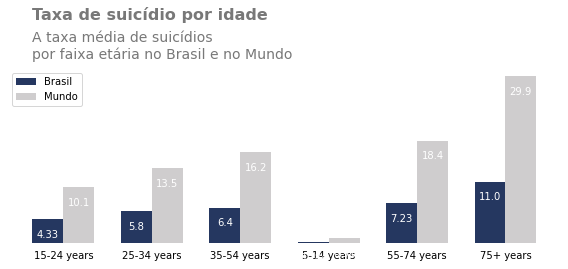

In [ ]:
#cria uma figura para grafico de barras
fig, ax = plt.subplots(figsize=(8, 4))

#plotar antes e depois separados
grafico1 = ax.bar(x - width_bar/2, idades_brasil, width_bar, label='Brasil', color = cor_brasil)
grafico2 = ax.bar(x + width_bar/2, idades_mundo, width_bar, label='Mundo', color = cor_mundo)

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{0:.3}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(grafico1)
autolabel(grafico2)

# plotar título
plt.text(-0.35, 40, 'Taxa de suicídio por idade',
         fontsize=16, 
         color="#787878",
         weight='bold')

# plotar subtitulo
plt.text(-0.35, 38,
         "A taxa média de suicídios\n"
         "por faixa etária no Brasil e no Mundo",
         verticalalignment="top",
         fontsize=14,
         color="#787878")

# labels do eixo
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)

# título
#ax.set_title('Ocorrencias totais')

# legenda
ax.legend()

# plotar gráfico
fig.tight_layout()
plt.show()

###O principal objetivo é visualizar qual faixa etária tem a maior taxa de suicídios e a diferença entre o Brasil e o Mundo.
###A faixa etária com a maior taxa é a de +75 anos, tanto no Brasil quanto no Mundo, podemos  considerar que a terceira idade é um momento de vulnerabilidade, abrir mão da saúde, da autonomia e dos papéis ativos na sociedade pode influenciar bastante nessa alta taxa.

#Maiores e menores médias
###Com a visualização dos países com as maiores taxas de suicídios, podemos notar uma grande concentração de países do Leste Europeu. 

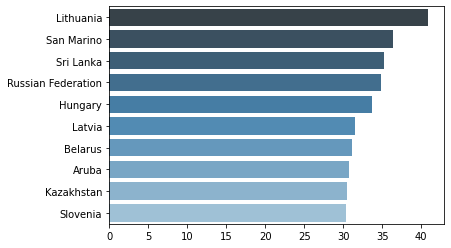

In [ ]:
#Plotando países com maiores taxas médias de suicidios
maiores_medias = dict(df.groupby('country')['suicides/100k pop'].mean().nlargest(10))
sns.barplot(list(maiores_medias.values()), list(maiores_medias.keys()), palette="Blues_d")
plt.show()

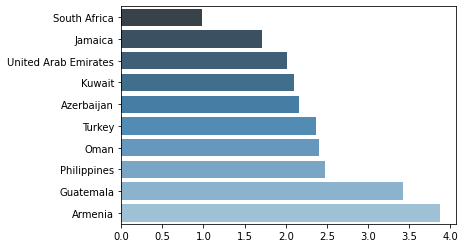

In [ ]:
#Plotando países com menores taxas de suicidios
menores_medias = dict(df.groupby('country')['suicides/100k pop'].mean().dropna().nsmallest(10))
sns.barplot(list(menores_medias.values()) , list(menores_medias.keys()), palette="Blues_d")
plt.show()

###Já em relação as menores taxas, é curioso o fato de nem um país desenvolvido estar entre os 10 primeiros, o que pôde ter influenciado esse fato, é que em suma maioria os países com as menores taxas tem uma relação estreita com a democracia de fato, o que acaba dificultando na confiabilidade dos dados.